drunken=code[code["사건종별코드"]==406] #음주운전


inconv=code[code["사건종별코드"]==402] #교통불편


viol=code[code["사건종별코드"]==403] #교통위반


a401=code[code["사건종별코드"]==401] #교통사고(사망하지도 않았고 뺑소니도 아닌 것)


a404=code[code["사건종별코드"]==404] #사망 대형사고


a405=code[code["사건종별코드"]==405] #인피도주

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수지원
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 1. 2020년 교통불편, 교통위반, 사망대형사고, 인피도주 데이터 준비

In [2]:
data20 = pd.read_csv("data/주소포함_2020.csv", encoding = "cp949")
data20.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_15912\505891077.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data20 = pd.read_csv("data/주소포함_2020.csv", encoding = "cp949")


,index,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,요일
0,38,대전청,2020-01-01 00:32:40,13,10,402,1,대전광역시 서구 탄방동(탄방동) 1447-1,127.386346,36.346856,NaN,Wednesday
1,41,대전청,2020-01-01 00:35:32,13,10,406,1,대전광역시 유성구 궁동(행정:온천2동) 423-8,127.349989,36.360797,NaN,Wednesday
2,54,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday
3,66,대전청,2020-01-01 00:43:01,13,10,401,1,대전광역시 중구 오류동(행정:오류동) 187-27,127.405055,36.328573,NaN,Wednesday
4,117,대전청,2020-01-01 18:43:35,13,10,401,3,대전광역시 동구 가양동 630,127.445780,36.345500,N,Wednesday


In [3]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146682 entries, 0 to 146681
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          146682 non-null  int64  
 1   RECV_DEPT_NM   146682 non-null  object 
 2   RECV_CPLT_DM   146682 non-null  object 
 3   NPA_CL         146682 non-null  int64  
 4   EVT_STAT_CD    146682 non-null  int64  
 5   EVT_CL_CD      146682 non-null  int64  
 6   RPTER_SEX      146682 non-null  object 
 7   HPPN_PNU_ADDR  146682 non-null  object 
 8   HPPN_X         146682 non-null  float64
 9   HPPN_Y         146682 non-null  float64
 10  SME_EVT_YN     73906 non-null   object 
 11  요일             146682 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 13.4+ MB


#### 칼럼명 수정

In [4]:
data20.rename(columns={"RECV_DEPT_NM":"접수부서코드","RECV_CPLT_DM":"접수완료일시", "NPA_CL":"경찰청구분", 
                       "EVT_STAT_CD":"사건상태코드","EVT_CL_CD":"사건종별코드","RPTER_SEX":"신고성별",
                       "HPPN_PNU_ADDR":"발생지점","HPPN_X":"발생좌표x","HPPN_Y":"발생좌표y","SME_EVT_YN":"동일사건여부"}, inplace=True)

In [5]:
data20.head(3)

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일
0,38,대전청,2020-01-01 00:32:40,13,10,402,1,대전광역시 서구 탄방동(탄방동) 1447-1,127.386346,36.346856,NaN,Wednesday
1,41,대전청,2020-01-01 00:35:32,13,10,406,1,대전광역시 유성구 궁동(행정:온천2동) 423-8,127.349989,36.360797,NaN,Wednesday
2,54,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday


#### 데이터타입 변경 (접수완료일시)

In [7]:
data20['접수완료일시'] = pd.to_datetime(data20['접수완료일시'])

In [8]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146682 entries, 0 to 146681
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   index   146682 non-null  int64         
 1   접수부서코드  146682 non-null  object        
 2   접수완료일시  146682 non-null  datetime64[ns]
 3   경찰청구분   146682 non-null  int64         
 4   사건상태코드  146682 non-null  int64         
 5   사건종별코드  146682 non-null  int64         
 6   신고성별    146682 non-null  object        
 7   발생지점    146682 non-null  object        
 8   발생좌표x   146682 non-null  float64       
 9   발생좌표y   146682 non-null  float64       
 10  동일사건여부  73906 non-null   object        
 11  요일      146682 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 13.4+ MB


#### 각 사건 데이터프레임 준비

In [11]:
inconv20=data20[data20["사건종별코드"]==402] #교통불편
viol20=data20[data20["사건종별코드"]==403] #교통위반
a404_20=data20[data20["사건종별코드"]==404] #사망 대형사고
a405_20=data20[data20["사건종별코드"]==405] #인피도주

## 1-1. 2020년 교통불편 그래프 그리기

#### "접수시간대" 칼럼 추가

In [14]:
# df[column nam].dt.hour 
inconv20["접수시간대"] = inconv20['접수완료일시'].dt.hour

C:\Users\USER\AppData\Local\Temp\ipykernel_15912\850061613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inconv20["접수시간대"] = inconv20['접수완료일시'].dt.hour


In [15]:
inconv20.head(3)

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,접수시간대
0,38,대전청,2020-01-01 00:32:40,13,10,402,1,대전광역시 서구 탄방동(탄방동) 1447-1,127.386346,36.346856,NaN,Wednesday,0
17,229,대전청,2020-01-01 20:30:28,13,10,402,1,대전광역시 서구 갈마동(행정:갈마2동) 345-10,127.373106,36.347504,NaN,Wednesday,20
28,336,대전청,2020-01-01 21:40:45,13,10,402,1,대전광역시 서구 내동(행정:내동) 152-18,127.368317,36.335125,NaN,Wednesday,21


#### 그래프 그리기

C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'2020년 교통불편 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

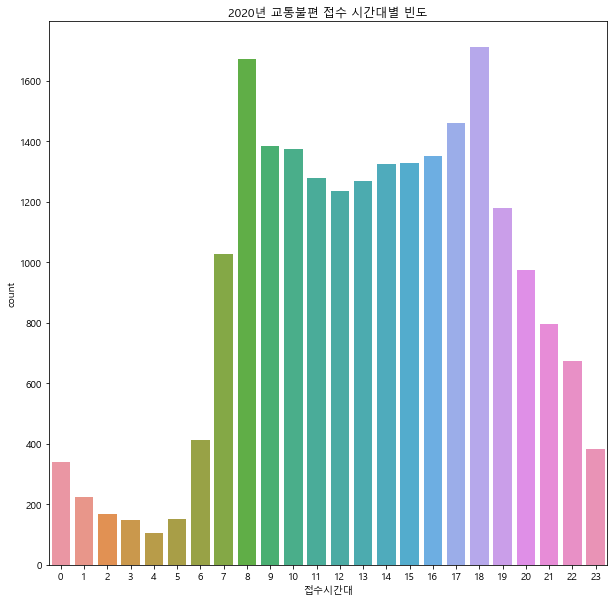

In [16]:
plt.figure(figsize=(10,10))
plt.title("2020년 교통불편 접수 시간대별 빈도")
sns.countplot("접수시간대", data=inconv20)

## 1-2. 2020년 교통위반 그래프 그리기

#### "접수시간대" 칼럼 추가

In [17]:
# df[column nam].dt.hour 
viol20["접수시간대"] = viol20['접수완료일시'].dt.hour

C:\Users\USER\AppData\Local\Temp\ipykernel_15912\4146359126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viol20["접수시간대"] = viol20['접수완료일시'].dt.hour


In [18]:
viol20.head(3)

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,접수시간대
5,118,대전청,2020-01-01 18:46:47,13,10,403,1,대전광역시 중구 중촌동,127.404663,36.341685,NaN,Wednesday,18
7,146,대전청,2020-01-01 19:08:41,13,10,403,3,대전광역시 동구 용운동(용운동) 349-4,127.460556,36.327222,NaN,Wednesday,19
9,149,대전청,2020-01-01 19:17:00,13,10,403,1,충청북도 청주시 흥덕구 비하동(강서1동) 409-3,127.419167,36.631944,Y,Wednesday,19


#### 그래프 그리기

C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'2020년 교통위반 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

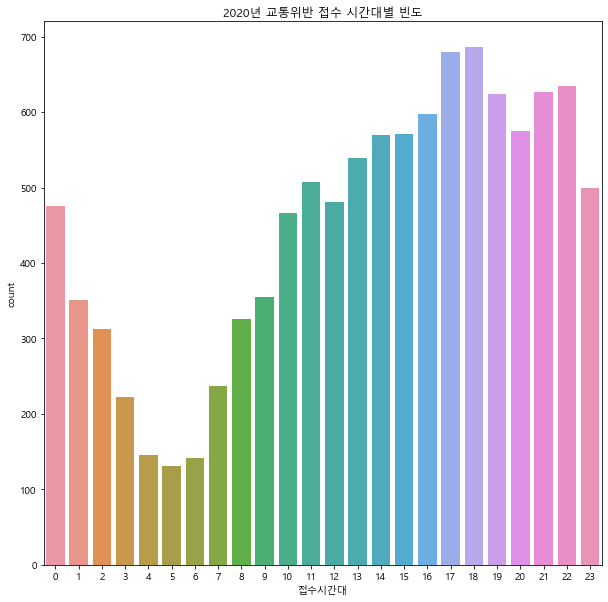

In [19]:
plt.figure(figsize=(10,10))
plt.title("2020년 교통위반 접수 시간대별 빈도")
sns.countplot("접수시간대", data=viol20)

## 1-3. 2020년 사망대형사고 그래프 그리기

#### "접수시간대" 칼럼 추가

In [20]:
# df[column nam].dt.hour 
a404_20["접수시간대"] = a404_20['접수완료일시'].dt.hour

C:\Users\USER\AppData\Local\Temp\ipykernel_15912\4012825254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a404_20["접수시간대"] = a404_20['접수완료일시'].dt.hour


In [21]:
a404_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 947 to 135006
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   7 non-null      int64         
 1   접수부서코드  7 non-null      object        
 2   접수완료일시  7 non-null      datetime64[ns]
 3   경찰청구분   7 non-null      int64         
 4   사건상태코드  7 non-null      int64         
 5   사건종별코드  7 non-null      int64         
 6   신고성별    7 non-null      object        
 7   발생지점    7 non-null      object        
 8   발생좌표x   7 non-null      float64       
 9   발생좌표y   7 non-null      float64       
 10  동일사건여부  6 non-null      object        
 11  요일      7 non-null      object        
 12  접수시간대   7 non-null      int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 784.0+ bytes


#### 그래프 그리기

C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'2020년 사망대형사고 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

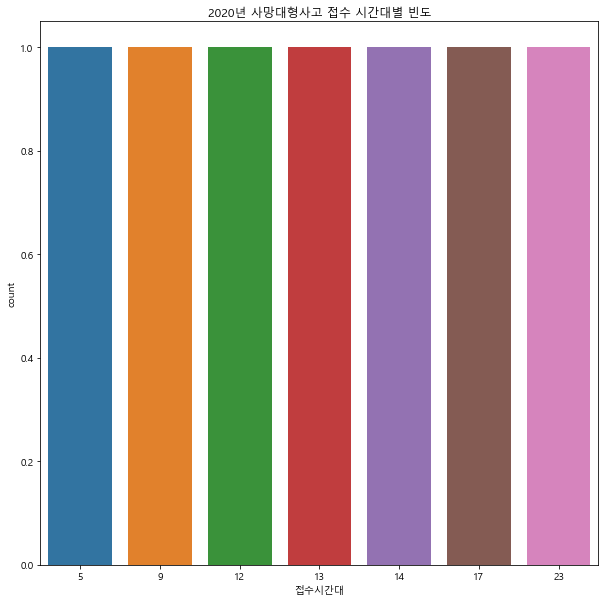

In [22]:
plt.figure(figsize=(10,10))
plt.title("2020년 사망대형사고 접수 시간대별 빈도")
sns.countplot("접수시간대", data=a404_20)

## 1-4. 2020년 인피도주 그래프 그리기

#### "접수시간대" 칼럼 추가

In [25]:
a405_20["접수시간대"] = a405_20["접수완료일시"].dt.hour

C:\Users\USER\AppData\Local\Temp\ipykernel_15912\3455731449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a405_20["접수시간대"] = a405_20["접수완료일시"].dt.hour


In [26]:
a405_20.head(3)

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,접수시간대
1457,12861,대전청,2020-01-05 02:52:39,13,10,405,1,대전광역시 서구 둔산동(둔산2동) 1036,127.378236,36.351491,NaN,Sunday,2
1660,14599,충남청,2020-01-05 03:10:53,19,10,405,1,대전광역시 서구 둔산동(둔산2동) 1036,127.378236,36.351491,NaN,Sunday,3
20699,176425,대전청,2020-05-27 03:28:46,13,10,405,3,대전광역시 서구 내동(내동) 152-27,127.366944,36.335000,NaN,Wednesday,3


#### 그래프 그리기

C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'2020년 사망대형사고 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

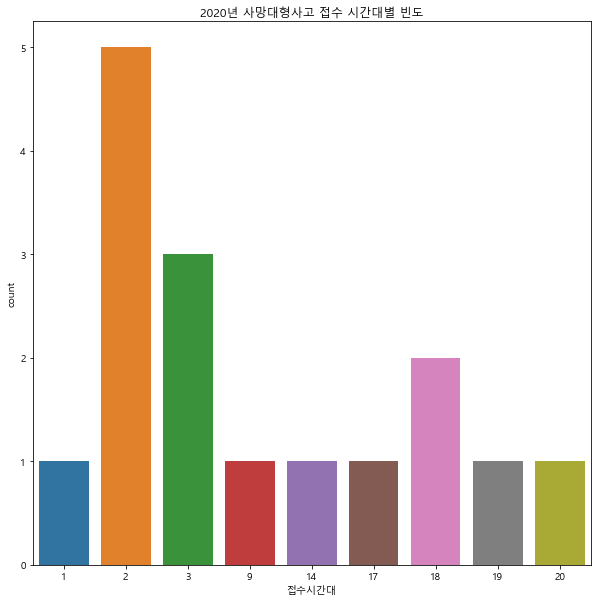

In [28]:
plt.figure(figsize=(10,10))
plt.title("2020년 사망대형사고 접수 시간대별 빈도")
sns.countplot("접수시간대", data=a405_20)

# 2. 2021년 교통불편, 교통위반, 사망대형사고, 인피도주 데이터 준비

In [4]:
data21 = pd.read_csv("data/주소포함_2021.csv", encoding = "cp949")
data21.head(3)

,index,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,요일
0,14,충남청,2021-03-07 00:02:48,19,10,406,1.0,충청남도 천안시 서북구 불당동(불당동) 1625,127.107500,36.811944,NaN,Sunday
1,20,충남청,2021-03-07 00:09:04,19,10,402,1.0,충청남도 천안시 동남구 문화동(문성동) 41-5,127.150988,36.811792,Y,Sunday
2,23,대전청,2021-03-07 00:07:54,13,10,401,2.0,대전광역시 서구 괴정동(괴정동) 367-40,127.371854,36.341961,NaN,Sunday


In [5]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276633 entries, 0 to 276632
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          276633 non-null  int64  
 1   RECV_DEPT_NM   276633 non-null  object 
 2   RECV_CPLT_DM   276633 non-null  object 
 3   NPA_CL         276633 non-null  int64  
 4   EVT_STAT_CD    276633 non-null  int64  
 5   EVT_CL_CD      276633 non-null  int64  
 6   RPTER_SEX      276633 non-null  float64
 7   HPPN_PNU_ADDR  276633 non-null  object 
 8   HPPN_X         276593 non-null  float64
 9   HPPN_Y         276593 non-null  float64
 10  SME_EVT_YN     66823 non-null   object 
 11  요일             276633 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 25.3+ MB


#### 컬럼명 수정

In [7]:
data21.rename(columns={"RECV_DEPT_NM":"접수부서코드","RECV_CPLT_DM":"접수완료일시", "NPA_CL":"경찰청구분", 
                       "EVT_STAT_CD":"사건상태코드","EVT_CL_CD":"사건종별코드","RPTER_SEX":"신고성별",
                       "HPPN_PNU_ADDR":"발생지점","HPPN_X":"발생좌표x","HPPN_Y":"발생좌표y","SME_EVT_YN":"동일사건여부"}, inplace=True)

In [8]:
data21.head(3)

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일
0,14,충남청,2021-03-07 00:02:48,19,10,406,1.0,충청남도 천안시 서북구 불당동(불당동) 1625,127.107500,36.811944,NaN,Sunday
1,20,충남청,2021-03-07 00:09:04,19,10,402,1.0,충청남도 천안시 동남구 문화동(문성동) 41-5,127.150988,36.811792,Y,Sunday
2,23,대전청,2021-03-07 00:07:54,13,10,401,2.0,대전광역시 서구 괴정동(괴정동) 367-40,127.371854,36.341961,NaN,Sunday


#### 데이터타입 변경 (접수완료일시)

In [9]:
data21["접수완료일시"] = pd.to_datetime(data21["접수완료일시"])

In [10]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276633 entries, 0 to 276632
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   index   276633 non-null  int64         
 1   접수부서코드  276633 non-null  object        
 2   접수완료일시  276633 non-null  datetime64[ns]
 3   경찰청구분   276633 non-null  int64         
 4   사건상태코드  276633 non-null  int64         
 5   사건종별코드  276633 non-null  int64         
 6   신고성별    276633 non-null  float64       
 7   발생지점    276633 non-null  object        
 8   발생좌표x   276593 non-null  float64       
 9   발생좌표y   276593 non-null  float64       
 10  동일사건여부  66823 non-null   object        
 11  요일      276633 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 25.3+ MB


#### "접수시간대" 칼럼 추가

In [11]:
data21["접수시간대"] = data21["접수완료일시"].dt.hour

In [12]:
data21.head(3)

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,접수시간대
0,14,충남청,2021-03-07 00:02:48,19,10,406,1.0,충청남도 천안시 서북구 불당동(불당동) 1625,127.107500,36.811944,NaN,Sunday,0
1,20,충남청,2021-03-07 00:09:04,19,10,402,1.0,충청남도 천안시 동남구 문화동(문성동) 41-5,127.150988,36.811792,Y,Sunday,0
2,23,대전청,2021-03-07 00:07:54,13,10,401,2.0,대전광역시 서구 괴정동(괴정동) 367-40,127.371854,36.341961,NaN,Sunday,0


#### 각 사건 데이터프레임 준비

In [13]:
inconv21=data21[data21["사건종별코드"]==402] #교통불편
viol21=data21[data21["사건종별코드"]==403] #교통위반
a404_21=data21[data21["사건종별코드"]==404] #사망 대형사고
a405_21=data21[data21["사건종별코드"]==405] #인피도주

## 2-1. 2021년 교통불편 그래프 그리기

C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'2020년 교통불편 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

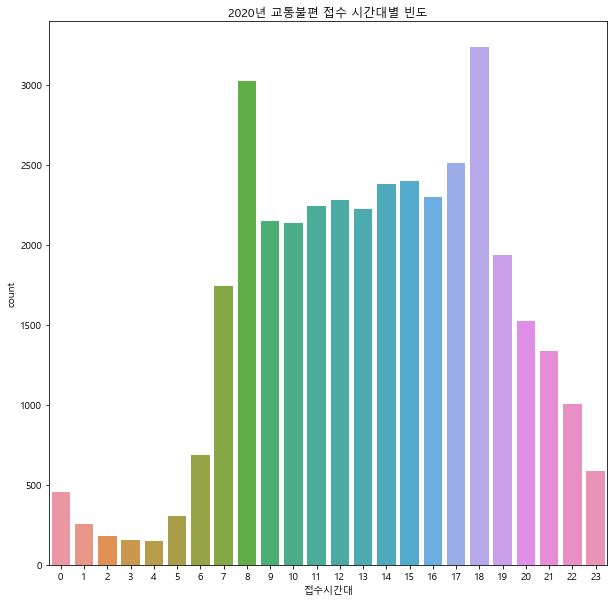

In [14]:
plt.figure(figsize=(10,10))
plt.title("2020년 교통불편 접수 시간대별 빈도")
sns.countplot("접수시간대", data=inconv21)

## 2-2. 2021년 교통위반 그래프 그리기

C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'2021년 교통위반 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

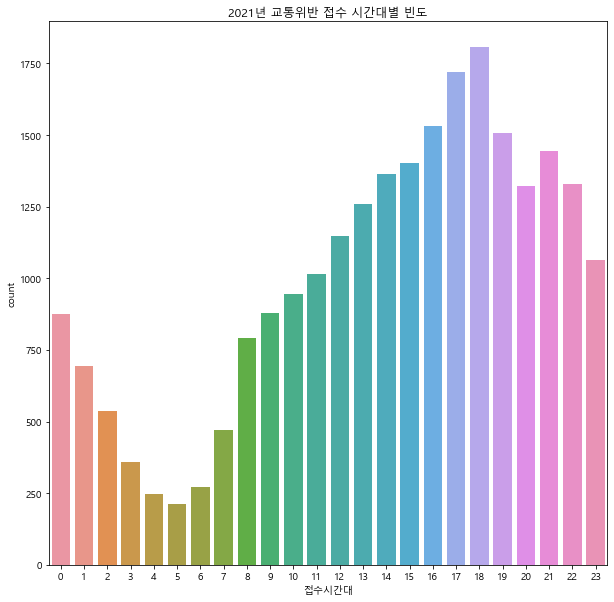

In [15]:
plt.figure(figsize=(10,10))
plt.title("2021년 교통위반 접수 시간대별 빈도")
sns.countplot("접수시간대", data=viol21)

## 2-3. 2021년 사망대형사고 그래프 그리기

C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'2021년 사망대형사고 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

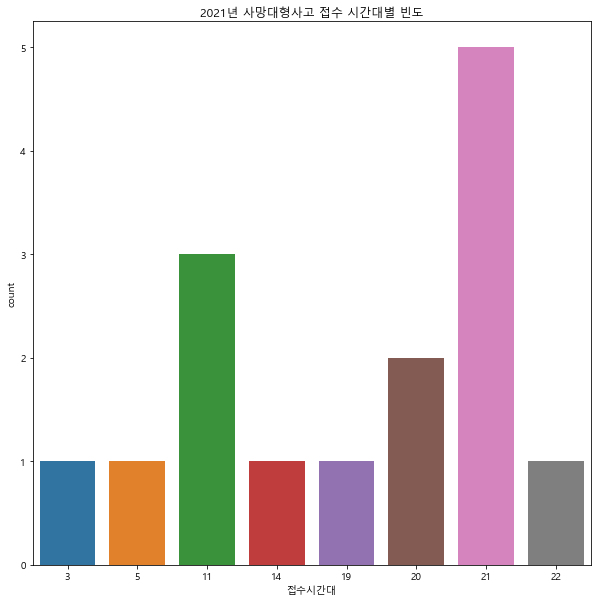

In [16]:
plt.figure(figsize=(10,10))
plt.title("2021년 사망대형사고 접수 시간대별 빈도")
sns.countplot("접수시간대", data=a404_21)

## 2-4. 2021년 인피도주 그래프 그리기

C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'2021년 인피도주 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

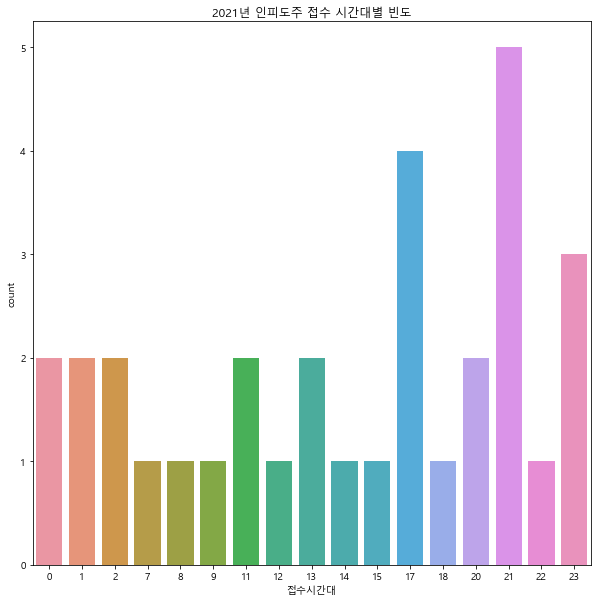

In [17]:
plt.figure(figsize=(10,10))
plt.title("2021년 인피도주 접수 시간대별 빈도")
sns.countplot("접수시간대", data=a405_21)